# Linear Methods of Manifold Learning
The goal of PCA is to decompose a matrix into a linear combination of variables that contain most of the information in the matrix. Hence, it can be termed a Linear Method of Manifold Learning. The space on to which the original data-points are projected and the transformation/ mapping are linear.<br>
We use numpy module in python to deal with large arrays and matrices and matplotlib.pyplot to plot the data.<br>
We have performed our dimensionality reduction on MNIST Dataset of Handwritten Digits.

In [109]:
import numpy as np
import matplotlib.pyplot as plt 

#load the dataset - MNIST
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape) #tuple of matrix dimensions
#print(digits.DESCR) #print description

<class 'sklearn.utils.Bunch'>
(1797, 64)


## Principle Component Analysis (PCA) 
Identify the principle components which are linear combinations of the dataset. The first component caputures maximum variance in the dataset, the second captures the remaining variance and so on. 
1. Compute the covariance matrix for this dataset
2. Decompose the covariance matrix to its eigen values and corresponding eigen vectors
3. Sort the eigen values in decreasing order 
4. Choose the first k values and their corresponding eigen vectors to get a transformation matrix for projections in the new subspace of k dimensions
5. The product of the projection matrix with the original data will give new data in subspace

Let us now step through the steps of PCA algorithm and see its effect on a single image from MNIST dataset. This is how the images are stored numerically in the MNIST dataset and how that translates into an image.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

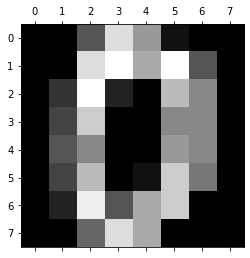

In [33]:
print(digits.images[0])
plt.gray() #sets the color map to gray
plt.matshow(digits.images[0]) #Display an array as a matrix - the upper left corner is set as the origin and rows are displayed horizontally
plt.show() #show the plot

Now we shall make a covariance matrix of this image and find its eigen values and vectors through SVD.

In [127]:
cov_mat = np.cov(digits.images[0]) #make covariance matrix of one image

eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat) #compute eigen values and eigen vectors
#eig_val_cov is each eigenvalue and its corresponding eigenvector an array in eig_vec_cov

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(eig_val_cov[i], eig_vec_cov[i]) for i in range(len(eig_val_cov))]

[[  4.42198328 -10.08761957]
 [ -2.68783348  -7.96919305]
 [ -3.32277565   2.95309698]
 [ -2.29278217   3.72669213]
 [ -3.44307895   4.00405093]
 [ -4.23419356   4.58125471]
 [  0.66926503  -0.27381888]
 [  5.41990823 -10.42547351]]


<Figure size 432x288 with 0 Axes>

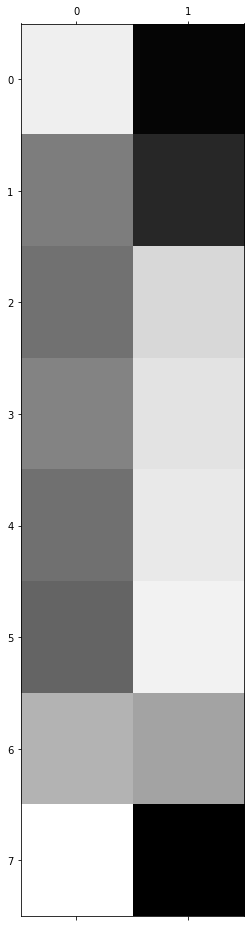

In [129]:
eig_pairs = sorted(eig_pairs, key=(lambda x: x[0]), reverse=True) #sort the eigen values
eig_pairs = np.array(eig_pairs)

transform = np.hstack(
    [eig_pairs[i, 1].reshape(digits.images[0].shape[1], 1) for i in range(2)] #transpose of each eigen vector of the top k eigen values
)

new_img = np.dot(digits.images[0], transform)
print(new_img)
plt.gray() #sets the color map to gray
plt.matshow(new_img) #Display an array as a matrix - the upper left corner is set as the origin and rows are displayed horizontally
plt.show() #show the plot

### function to perform PCA on each image

In [182]:
def pca(image, k):
    cov_mat = np.cov(image)
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[i]) for i in range(len(eig_val_cov))]
    eig_pairs = sorted(eig_pairs, key=(lambda x: x[0]), reverse=True)
    eig_pairs = np.array(eig_pairs)
    transform = np.hstack(
        [eig_pairs[i, 1].reshape(image.shape[1], 1) for i in range(k)]
    )
    new_img = np.dot(image, transform)
    return new_img, transform

Reduce the dimensionality of all the images in MNIST 

In [167]:
digits.new_images = []
for old_img in digits.images:
    digits.new_images.append(pca(old_img,2))
len(digits.new_images)

1797

### Reconstruct the images from the transform matrix

Text(0.5, 0, 'original.png')

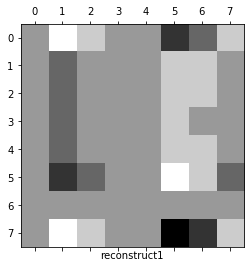

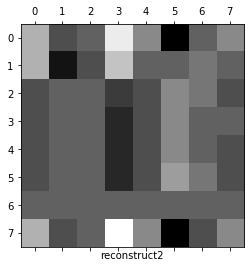

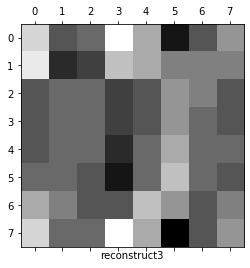

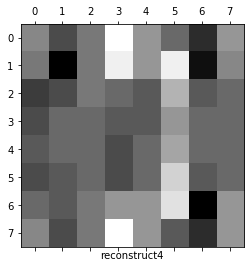

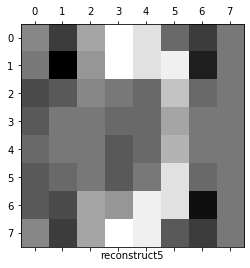

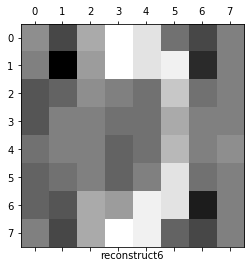

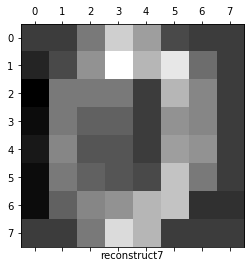

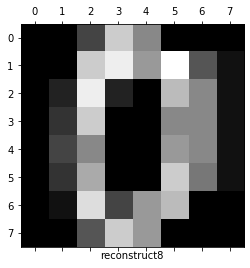

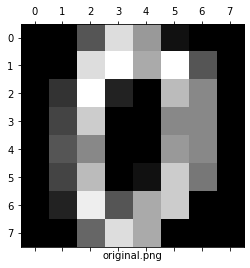

In [206]:
def inverse_pca(img, components):
    reconstruct = np.dot(img, components.T).astype(int)
    return reconstruct #.reshape(-1,8,8)
    
for i in range(8):
    pca_image, transform = pca(digits.images[0], i+1)
    reconstruct = inverse_pca(pca_image, transform)
    plt.matshow(reconstruct)
    plt.xlabel('reconstruct'+str(i+1))

plt.matshow(digits.images[0])
plt.xlabel('original.png')